In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Analysing the 'Penguins' dataset. 
1- Data description and info

2- Reformatting and data cleaning

3- Running a linear regression model and Statistical Analysis

4- Running a K means classification model

5- Data Visualisation


In [2]:
penguins=sns.load_dataset('penguins')
penguins.shape

(344, 7)

In [3]:
pd.set_option('display.precision',1)
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.0,342.0,342.0,342.0
mean,43.9,17.2,200.9,4201.8
std,5.5,2.0,14.1,802.0
min,32.1,13.1,172.0,2700.0
25%,39.2,15.6,190.0,3550.0
50%,44.5,17.3,197.0,4050.0
75%,48.5,18.7,213.0,4750.0
max,59.6,21.5,231.0,6300.0


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
species              344 non-null object
island               344 non-null object
bill_length_mm       342 non-null float64
bill_depth_mm        342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE



Removing null values

In [6]:
penguins=penguins.dropna(how='any', axis=0)
penguins.shape

(333, 7)

In [7]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

the original index started at '0'. This doesnt make much sense, so we change the index to start at '1'.

In [8]:
new_index=pd.Series(range(1,len(penguins)+1))
penguins=penguins.set_index(new_index)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

We would also like to give each species a 'code', so that its easier to work with the data

In [10]:
species_code=[]

In [11]:
def code():
    for entry in penguins['species']:
        if entry=='Adelie':
            rank=1
            species_code.append(rank)
        elif entry=='Chinstrap':
            rank=2
            species_code.append(rank)
        elif entry=='Gentoo':
            rank=3
            species_code.append(rank)
    return species_code

In [12]:
species_code=code()

In [13]:
penguins['species code']=species_code

In [14]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species code
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1


we can also group our data based on different features, eg species or island

In [15]:
species_group=penguins.groupby('species').mean()
species_group

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species code
species,,,,,
Adelie,38.8,18.3,190.1,3706.2,1
Chinstrap,48.8,18.4,195.8,3733.1,2
Gentoo,47.6,15.0,217.2,5092.4,3


Next we are interested in seeing which pengs weigh over 5800g

In [16]:
heavy_pengs=penguins[penguins['body_mass_g']>5800]
heavy_pengs

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species code
228,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,MALE,3
230,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,MALE,3
232,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE,3
247,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE,3
290,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE,3
292,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE,3
323,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,MALE,3
327,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE,3
328,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE,3


how many females and males we have...

In [17]:
penguins['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

And also see which boys and gals have the largest flippers!

In [18]:
penguins.loc[penguins['sex']=='FEMALE', 'flipper_length_mm'].max()

222.0

In [19]:
penguins.loc[penguins['sex']=='MALE','flipper_length_mm'].max()

231.0

Our heaviest pengs...

In [20]:
heaviest_pengs=penguins.sort_values(by=['body_mass_g'], ascending=False)
heaviest_pengs.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species code
232,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE,3
247,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE,3
290,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE,3
328,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE,3
292,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE,3


Now we are shifting our focus to the females only.

In [21]:
females=penguins.loc[penguins['sex']=='FEMALE']

In [22]:
heaviest_females=females.sort_values(by=['body_mass_g'], ascending=False)
heaviest_females.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species code
332,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,3
286,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,FEMALE,3
248,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,FEMALE,3
262,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE,3
246,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE,3


In [23]:
heavy_female=females.loc[females['body_mass_g'].idxmax()]
heavy_female

species              Gentoo
island               Biscoe
bill_length_mm        5e+01
bill_depth_mm         1e+01
flipper_length_mm     2e+02
body_mass_g           5e+03
sex                  FEMALE
species code              3
Name: 286, dtype: object

We would like to predict bodymass based on flipper length. The island is also colour coded, to see if there is a difference in the size of pengs seen on each island

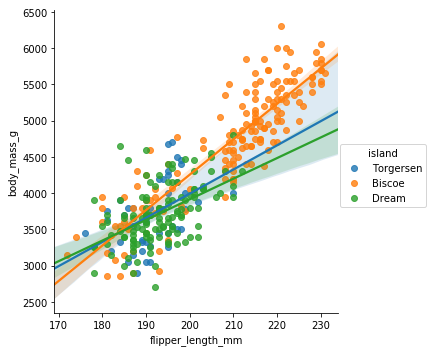

In [24]:
# Predicting bodymass based on flipper length
%matplotlib inline
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=penguins, hue='island')

Next we can check the distribution of out data. This determines which tests we run later.

In [25]:
# Gaussian Distribution?
from scipy.stats import shapiro
data=pd.concat([penguins['flipper_length_mm'],penguins['body_mass_g']], axis=1)

stat, p =shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.781, p=0.000
Sample does not look Gaussian (reject H0)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.cross_validation import KFold

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Next we run the linear regressor model on the data. The final score of 0.76 isnt too bad for a first trial. This means our model obtained an accuracy of 76.2%

In [27]:
data=pd.concat([penguins['flipper_length_mm'],penguins['body_mass_g']], axis=1)

x=data['flipper_length_mm']
y=data['body_mass_g']

x=x.values.reshape(-1, 1)
y=y.values.reshape(-1, 1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor=LinearRegression()

model=regressor.fit(x_train,y_train)
model.score(x,y)

0.76206676815859886

In [28]:
predictions=model.predict(x_test)


Plotting the model predictions and regression line alongside our data shows a clear linear relationship between flipper length and mass

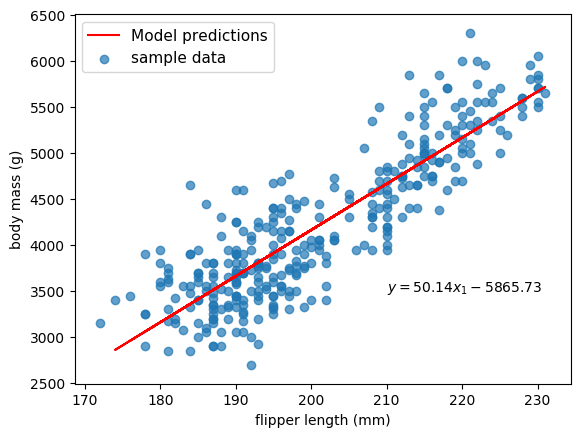

In [29]:
plt.style.use('default')
fig, ax = plt.subplots()
ax.plot(x_test, predictions, label= 'Model predictions', color='r')
ax.scatter(x,y, label= 'sample data', alpha=0.7)
ax.set_ylabel('body mass (g)')
ax.set_xlabel('flipper length (mm)')
ax.legend(facecolor='white', fontsize=11)
ax.text(210, 3500, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)))

Running a pearson correlation test to confirm this..

In [30]:
from scipy.stats import pearsonr
corr, _ =pearsonr(data['flipper_length_mm'],data['body_mass_g'])
print('Pearsons corr: %0.3f' %corr)

Pearsons corr: 0.873


# Multi Class Classification
Predicting the island based on flipper length and body mass with K nearest neighbours

We need to encode our categorical variables, which will provide them with a numerical value. This has been done here with the use of the LabelEncoder. 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

x=pd.concat([penguins['flipper_length_mm'],penguins['body_mass_g']], axis=1)
y=penguins['island']

le = preprocessing.LabelEncoder()

y_encoded=le.fit_transform(y)
print(le.classes_)
print(y_encoded)

x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=0)

['Biscoe' 'Dream' 'Torgersen']
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


When using the knn algorthim, the value of k we use will impact the accuracy of our model, and therefore the optimum k needs to be found.

In [32]:
from sklearn import metrics
k_range=range(1,17)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    predictions_test=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test, predictions_test)
    scores_list.append(metrics.accuracy_score(y_test, predictions_test))


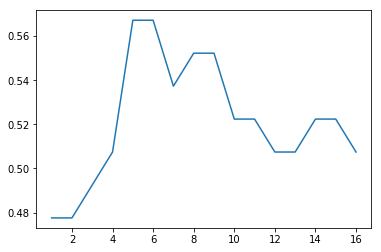

In [33]:
%matplotlib inline
plt.plot(k_range, scores_list)

For this model, 5 was used for the k value, which provides the highest accuracy and lower computational cost than a value of 6.

In [34]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
predictions=model.predict(x_test)

In [36]:
accuracy=metrics.accuracy_score(y_test, predictions)
print(f'accuracy: {100* accuracy:.2f} %')

accuracy: 56.72 %


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.83      0.69      0.75        35
          1       0.38      0.68      0.49        19
          2       0.25      0.08      0.12        13

avg / total       0.59      0.57      0.55        67



Our final model obtained an accuracy of 56.7%. Where 0-Biscoe, 1-Dream, 2-Torgersen, we can see that the model struggled to classify data from the Torgersen island.   

In [38]:
le.inverse_transform(y_test)

array(['Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream',
       'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Torgersen', 'Dream',
       'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Torgersen', 'Dream', 'Dream',
       'Torgersen', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe',
       'Biscoe', 'Dream', 'Dream', 'Torgersen', 'Biscoe', 'Dream',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Dream',
       'Torgersen', 'Biscoe', 'Biscoe', 'Torgersen', 'Torgersen',
       'Torgersen', 'Torgersen', 'Torgersen', 'Biscoe', 'Biscoe', 'Biscoe',
       'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Dream',
       'Torgersen', 'Dream', 'Biscoe', 'Torgersen', 'Dream', 'Torgersen',
       'Biscoe', 'Biscoe', 'Dream', 'Biscoe'], dtype=object)

In [39]:
le.inverse_transform(predictions)

array(['Dream', 'Biscoe', 'Biscoe', 'Dream', 'Dream', 'Dream', 'Torgersen',
       'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Dream',
       'Dream', 'Dream', 'Biscoe', 'Dream', 'Dream', 'Dream', 'Dream',
       'Biscoe', 'Biscoe', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Dream',
       'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Dream', 'Biscoe',
       'Biscoe', 'Dream', 'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe',
       'Dream', 'Dream', 'Biscoe', 'Dream', 'Dream', 'Dream', 'Biscoe',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Dream',
       'Biscoe', 'Dream', 'Torgersen', 'Biscoe', 'Torgersen', 'Dream',
       'Dream', 'Biscoe', 'Biscoe', 'Torgersen', 'Biscoe'], dtype=object)

In [40]:
y_data_df=pd.DataFrame(data=le.inverse_transform(y_test), columns=['data sample'])


In [41]:
prediction_data_df=pd.DataFrame(data=le.inverse_transform(predictions), columns=['predictions'])


here we have an snippet of the predictions made vs the original data..

In [42]:
compare=pd.merge(prediction_data_df,y_data_df, left_index=True, right_index=True )
compare.head(10)

,predictions,data sample
0,Dream,Biscoe
1,Biscoe,Biscoe
2,Biscoe,Biscoe
3,Dream,Biscoe
4,Dream,Biscoe
5,Dream,Biscoe
6,Torgersen,Dream
7,Biscoe,Biscoe
8,Biscoe,Biscoe
9,Dream,Dream
